#### Введение в web разработку

В python довольно легко и просто делать и использовать различные веб приложения и сервисы.

##### HTTP протокол
HTTP протокол - один из самых популярных протоколов для сетевого взаимодействия. Рассмотрим его на примере обращения к поисковому сервису. Допустим, мы обращаемся к поисковому сервису и хотим найти что-то про python

В браузере при этом набран запрос `https://ya.ru/search/?text=python`. Он состоит из следующих частей
  * https:// - это протокол (безопасный http)
  * ya.ru - это сервер, к которому идет обращение
  * search - путь
  * ? разделитель между путем и параметрами запроса
  * text=python - параметры запроса

При запросе страницы этой страницы браузер отправляет запрос, который состоит из:
  * заголовков, например `User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36`, чтобы дать знать сервису, кто именно в него пришел. Это важно и для статистики и для того, чтобы принять решение, настольную/мобильную версию сайта показать, или сделать что-то еще. Авторизационная информация в виде различных токенов или кук тоже передается в заголовках (об этом потом)
  * Метода (в данном случае GET, но бывают и другие, например POST/PUT/DELETE)
  * Пути и параметров

Браузер скачивает страницу, выполняет различные скрипты для красоты и интерактива, визуализирует ее на основе таблиц стилей, и показывает пользователю. Отлично для людей, но не пригодно для различной автоматики и взаимодействия систем. Если необходимо какой-то программой получать какие-то данные для последующей обработки, то их необходимо получать в машинночитаемом виде. Для этого есть как встроенные в язык библиотеки (urllib), так и сторонние библиотеки. Самой популярной является библиотека requests. Для того, чтобы установить ее, нужно выполнить команду `pip install requests`. Далее считаем, что этот шаг уже был выполнен.


In [2]:
import requests
requests.get("https://ya.ru/search/?text=python")

<Response [200]>

Что такое `<Response [200]>` и где результаты поиска?
Вся автоматизация и взаимодействие систем строятся не на всевозможных описаниях на естественном языке, а на стандартных кодах ответов. В http протоколе есть 5 семейств ответов: 1xx, 2xx, 3xx, 4xx, 5xx - это трехзначные числа
  * 1xx - информационные ответы (ни разу их не встречал)
  * 2xx - успешные ответы. Все ОК. Сервис успешно принял и обработал запрос
  * 3xx - перенаправления. Сервер знает, что по запрошенному адресу ничего нет, и знает, куда именно нужно перенаправить обратившегося с его запросом, чтобы он был выполнен там.
  * 4xx - ошибки клиента. Запрос невалиден, доступ запрещен, превышены квоты, и тд
  * 5xx - ошибки сервера. Код обработки запроса завершился с неожиданной ошибкой, либо обработчик в принципе отсутствует и незапущен, 
  ![alt text](image.png)

*Все это интересно, а результаты-то где?*

Результаты доступны в общем случае при обращении к свойству `text`

'<!DOCTYPE html><html class="i-ua_js_no" lang="ru"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width,initial-scale=1"/><title>Яндекс</title><meta name="referrer" content="always"/><meta name="color-scheme" content="light"/><meta name="theme-color" content="#fff"/><link rel="preconnect" href="https://avatars.mds.yandex.net"/><link rel="preconnect" href="https://favicon.yandex.net"/><link rel="preload" href="//yastatic.net/s3/home/fonts/ys/4/text-regular.woff2" as="font" type="font/woff2" crossorigin="anonymous"/><link rel="preload" href="//yastatic.net/s3/home/fonts/ys/4/text-medium.woff2" as="font" type="font/woff2" crossorigin="anonymous"/><link rel="preload" href="//yastatic.net/s3/home/fonts/ys/4/text-bold.woff2" as="font" type="font/woff2" crossorigin="anonymous"/><link rel="search" title="Яндекс" type="application/opensearchdescription+xml" href="/search/opensearch.xml"/><meta property="og:type" content="website"/><meta property="og:site_name" content=
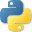
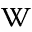
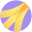
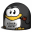
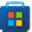

In [3]:
import requests
requests.get("https://ya.ru/search/?text=python").text

Выглядит браузерочитаемым, но что с полученным результатом может сделать python программа? Где список результатов поиска в понятном формате? ~~Он доступен в коммерческой версии API поиска~~ Поэтому мы рассмотрим машинночитаемые данные на более простом примере.

##### Формат JSON
JSON - JavaScript Object Notation - самый популярный способ описания структурных данных и передачи их между системами. Определяется он рекурсивно
  * Дробные числа записываются как обычные числа с разделителем  `.`. Например, `1, 2.0, -100500` - все это валидные JSON представления чисел
  * Строки записываются в двойных кавычках. `"this is a string", "это строка", ""`
  * логические значения `true` и `false` так и записываются
  * массивы записываются в квадратных скобках `[1, 2, 3], ["1", [], [[]]]`. - валидные массивы *где-то такую запись мы уже видели* 
  * словари записываются в фигурных скобках `{"key": "value", "key2": []}` *тоже что-то знакомое*

  Для работы с JSON в python есть встроеный модуль `json`

In [4]:
import json
data = {
    "name": "John",
    "age": 30,
    "city": "New York"
}

dumped = json.dumps(data)
print(dumped)

unpacked = json.loads(dumped)
print(unpacked)

{"name": "John", "age": 30, "city": "New York"}
{'name': 'John', 'age': 30, 'city': 'New York'}


In [ ]:
import requests

# а здесь обращаемся к методу `json() (со скобками!) - получаем уже десериализованный объект, а не просто строку`
result = requests.get("https://v2.jokeapi.dev/joke/Programming").json()
print(type(result))

if "setup" in result:
    print("setup:", result["setup"])
    print("delivery:", result["delivery"])
else:
    print("joke:", result["joke"])

<class 'dict'>
setup: What is the most used language in programming?
delivery: Profanity.


#### HTTP методы и модифицирующие действия
В прошлом примере мы получали данные, которые нам отдавал сервер по какому-то запросу. Сами данные на сервере при этом никак не менялись. Но что, если их надо менять? Как то же туда попадают новые шутки, меняются существующие и удаляются несмешные/неприемлемые. Для этого в протоколе HTTP предусмотрены специальные методы. Прежде, чем перейти к их описанию, рассмотрим следующие свойства:
  * Кэшируемость. На всех уровнях от браузера и промежуточных серверов, может так случиться, что запомнить ранее отданный результат по какому-то запросу и отдать его же при получении такого же запроса, а не выполнять сам запрос еще раз, сильно быстрее и экономичнее (и иногда так и делают при запросе так называемых статических файлов: картинок, таблиц стилей и тд)
  * Идемпотентность. Метод `идемпотентен`, если два и более его вызова с одними и теми же параметрами приводят к тому же самому результату, как если бы он был вызван ровно один раз.
  * Повторные вызовы. Из-за сетевых проблем и всякого рода эвристик программа может принять решение выполнить один и тот же запрос несколько раз без каких-либо действий со стороны пользователя.

  **Метод GET**
  Предназначен для получения данных. Идемпотентен, повторные вызовы не приводят к изменению состояния сервера.
  
  **Нельзя через метод GET реализовывать модифицирующие действия**
  Вам никто это не запретит явно, но если вы так сделаете, можете столкнуться с неприятными последствиями: действия *иногда* будут совершаться, когда не нужно (из-за непрозрачных повторных запросов) и *время от времени* не будут совершаться, когда нужно, из-за кэширования.

  **Метод POST**
  Предназначен для отправки данных на сервер. Не идемпотентен, повторные вызовы приводят к изменению состояния сервера. Чаще всего используется для создания новых сущностей: регистрация пользователя, создания записи в блоге, покупки на сайте, и тд. Повторные вызовы не могут случиться без участия пользователя

  **Метод PUT**
  Предназначен для создания или (чаще) полной перезаписи сущности на сервере. Должен быть идемпотентен. Повторные вызовы не могут случиться без участия пользователя. 

  **Метод DELETE**
  Предназначен для удаления сущности на сервере. Должен быть идемпотентен. Повторные вызовы не могут случиться без участия пользователя. Не возвращает никаких данных, кроме кода

  **Метод PATCH**
  Предназначен для частичного обновления сущности на сервере. Должен быть идемпотентен. Повторные вызовы не могут случиться без участия пользователя

Есть и другие, но эти основные. Для каждого из них в библиотеке `requests` есть соответствующий метод.


##### Практика
https://mixedanalytics.com/blog/list-actually-free-open-no-auth-needed-apis/